Plotting the graph

In [92]:
import pandas as pd
from geopy.geocoders import ArcGIS
import folium

In [123]:
data = pd.read_csv("../datasets/IND_adm3.csv")

data.drop(columns=['OBJECTID','ID_0','ISO','NAME_0','ID_1','ENGTYPE_3','NL_NAME_3','VARNAME_3'], inplace= True)



,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3
0,Andaman and Nicobar,1,Andaman Islands,1,n.a. ( 2178),Taluk
1,Andaman and Nicobar,2,Nicobar Islands,2,n.a. ( 2304),Taluk
2,Andhra Pradesh,3,Anantapur,3,Anantapur,Taluk
3,Andhra Pradesh,3,Anantapur,4,Dharmavaram,Taluk
4,Andhra Pradesh,3,Anantapur,5,Gooty,Taluk


In [124]:
data.head()

,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3
0,Andaman and Nicobar,1,Andaman Islands,1,n.a. ( 2178),Taluk
1,Andaman and Nicobar,2,Nicobar Islands,2,n.a. ( 2304),Taluk
2,Andhra Pradesh,3,Anantapur,3,Anantapur,Taluk
3,Andhra Pradesh,3,Anantapur,4,Dharmavaram,Taluk
4,Andhra Pradesh,3,Anantapur,5,Gooty,Taluk


In [125]:
data.columns

Index(['NAME_1', 'ID_2', 'NAME_2', 'ID_3', 'NAME_3', 'TYPE_3'], dtype='object')

In [126]:
data['Taluka'] = data['NAME_1']+','+data['NAME_2'] +','+ data['NAME_3']

In [127]:
data.head(3)

,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3,Taluka
0,Andaman and Nicobar,1,Andaman Islands,1,n.a. ( 2178),Taluk,"Andaman and Nicobar,Andaman Islands,n.a. ( 2178)"
1,Andaman and Nicobar,2,Nicobar Islands,2,n.a. ( 2304),Taluk,"Andaman and Nicobar,Nicobar Islands,n.a. ( 2304)"
2,Andhra Pradesh,3,Anantapur,3,Anantapur,Taluk,"Andhra Pradesh,Anantapur,Anantapur"


In [128]:
nom= ArcGIS()

In [129]:
nom.geocode('Haryana,Bhiwani,Bawani Khera')

Location(Bawani Khera, Bhiwani, Haryana, (28.9491, 76.0327, 0.0))

In [130]:
data['Coordinates']= data['Taluka'].apply(nom.geocode)

In [131]:
data.head()

,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3,Taluka,Coordinates
0,Andaman and Nicobar,1,Andaman Islands,1,n.a. ( 2178),Taluk,"Andaman and Nicobar,Andaman Islands,n.a. ( 2178)","(Andaman Islands, Andaman and Nicobar Islands,..."
1,Andaman and Nicobar,2,Nicobar Islands,2,n.a. ( 2304),Taluk,"Andaman and Nicobar,Nicobar Islands,n.a. ( 2304)","(Nicobar Islands, Andaman and Nicobar Islands,..."
2,Andhra Pradesh,3,Anantapur,3,Anantapur,Taluk,"Andhra Pradesh,Anantapur,Anantapur","(Anantapur, Andhra Pradesh, (14.67784, 77.60813))"
3,Andhra Pradesh,3,Anantapur,4,Dharmavaram,Taluk,"Andhra Pradesh,Anantapur,Dharmavaram","(Dharmavaram, Anantapur, Andhra Pradesh, (14.4..."
4,Andhra Pradesh,3,Anantapur,5,Gooty,Taluk,"Andhra Pradesh,Anantapur,Gooty","(Gooty, Anantapur, Andhra Pradesh, (15.11836, ..."


In [132]:
data['Latitude']= data['Coordinates'].apply(lambda x: x.latitude)
data['Longitude']= data['Coordinates'].apply(lambda x: x.longitude)

In [133]:
data.head(5)

,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3,Taluka,Coordinates,Latitude,Longitude
0,Andaman and Nicobar,1,Andaman Islands,1,n.a. ( 2178),Taluk,"Andaman and Nicobar,Andaman Islands,n.a. ( 2178)","(Andaman Islands, Andaman and Nicobar Islands,...",10.75776,92.52136
1,Andaman and Nicobar,2,Nicobar Islands,2,n.a. ( 2304),Taluk,"Andaman and Nicobar,Nicobar Islands,n.a. ( 2304)","(Nicobar Islands, Andaman and Nicobar Islands,...",7.03002,93.79028
2,Andhra Pradesh,3,Anantapur,3,Anantapur,Taluk,"Andhra Pradesh,Anantapur,Anantapur","(Anantapur, Andhra Pradesh, (14.67784, 77.60813))",14.67784,77.60813
3,Andhra Pradesh,3,Anantapur,4,Dharmavaram,Taluk,"Andhra Pradesh,Anantapur,Dharmavaram","(Dharmavaram, Anantapur, Andhra Pradesh, (14.4...",14.41435,77.72035
4,Andhra Pradesh,3,Anantapur,5,Gooty,Taluk,"Andhra Pradesh,Anantapur,Gooty","(Gooty, Anantapur, Andhra Pradesh, (15.11836, ...",15.11836,77.63776


In [134]:
from geopy.distance import geodesic


def find_neighbors(city_list_df, distance_threshold=50):
    neighbors = {}
    for i, row_i in city_list_df.iterrows():
        city1_name, lat1, lon1 = row_i['NAME_3'], row_i['Latitude'], row_i['Longitude']
        neighbors[city1_name] = []
        for j, row_j in city_list_df.iterrows():
            if i != j:
                city2_name, lat2, lon2 = row_j['NAME_3'], row_j['Latitude'], row_j['Longitude']
                distance = geodesic((lat1, lon1), (lat2, lon2)).km
                if distance <= distance_threshold:
                    neighbors[city1_name].append(city2_name)
    return neighbors

city_list_df = pd.DataFrame(data,columns=['NAME_3','Latitude','Longitude'])
neighbors = find_neighbors(city_list_df)

In [137]:


Neighbour_df= pd.DataFrame(list(neighbors.items()),columns=['City','Neighbors'])

In [139]:
data.to_csv("../datasets/Data_with_Lat_lon.csv", index= False)

In [140]:
data1 = data[['NAME_3', 'Latitude', 'Longitude']]
data1.rename(columns={'NAME_3': 'City'}, inplace= True)

/var/folders/3c/b623bbqx5f53n1_tf62yjhz40000gp/T/ipykernel_15235/541883179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.rename(columns={'NAME_3': 'City'}, inplace= True)


In [141]:
data1

,City,Latitude,Longitude
0,n.a. ( 2178),10.75776,92.521360
1,n.a. ( 2304),7.03002,93.790280
2,Anantapur,14.67784,77.608130
3,Dharmavaram,14.41435,77.720350
4,Gooty,15.11836,77.637760
...,...,...,...
2294,Islampur,26.25980,88.187401
2295,Raiganj,25.61281,88.124490
2296,Ghatal,22.66244,87.733990
2297,Jhargram,22.45496,86.998530


In [142]:
a_list = data[['NAME_3', 'Latitude', 'Longitude']].values.tolist()

In [143]:
a_list

[['n.a. ( 2178)', 10.75776, 92.52136],
 ['n.a. ( 2304)', 7.03002, 93.79028],
 ['Anantapur', 14.67784, 77.60813],
 ['Dharmavaram', 14.41435, 77.72035],
 ['Gooty', 15.11836, 77.63776],
 ['Hindupur', 13.82807, 77.49143],
 ['Kadiri', 14.11168, 78.15982],
 ['Kalyandurg', 14.54519, 77.10552],
 ['Madakasira', 13.94095, 77.27063],
 ['Penukonda', 14.08286, 77.59473],
 ['Rayadurg', 14.70581, 76.85683],
 ['Tadpatri', 14.90832, 78.01031],
 ['Chandragiri', 13.58872, 79.31625],
 ['Chittoor', 13.2195, 79.103302],
 ['Kuppam', 12.7409347, 78.3442146],
 ['Madanapalle', 13.5503, 78.50288],
 ['Palmaner', 13.2, 78.74725],
 ['Punganuru', 13.3646331, 78.5739552],
 ['Puttur', 13.44189, 79.55314],
 ['Satyavedu', 13.43661, 79.95774],
 ['Sri Kalahasti', 13.75514, 79.70143],
 ['Vayalipad', 13.63732, 78.62991],
 ['Badvel', 14.7451, 79.06288],
 ['Cuddapah', 14.47995, 78.82346],
 ['Jammalamadugu', 14.84677, 78.38314],
 ['Kamalapuram', 14.5983, 78.66948],
 ['Proddatur', 14.7502, 78.54813],
 ['Pulivendla', 14.42139, 7

In [146]:
import math
def cal_heuristic(lat1, lon1, lat2, lon2):
    R= 6371
    lat1_rad, lon1_rad = math.radians(lat1), math.radians(lon1)
    lat2_rad, lon2_rad = math.radians(lat2), math.radians(lon2)
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

if data1 is not None:
    # Assuming 'City', 'Latitude', 'Longitude' are columns in your CSV
    cities = data1[['City', 'Latitude', 'Longitude']].set_index('City')
    
    # Calculate heuristic values (distances to a goal city)
    goal_city = 'Ambala'  # Replace with your goal city
    goal_lat, goal_lon = cities.loc[goal_city, 'Latitude'], cities.loc[goal_city, 'Longitude']
    
    heuristics = {}
    for city, row in cities.iterrows():
        if city != goal_city:
            distance = cal_heuristic(row['Latitude'], row['Longitude'], goal_lat, goal_lon)
            heuristics[city] = distance
    
    heuristic_df= pd.DataFrame(list(heuristics.items()), columns=['City','Heuristic_dist_KM'])
    print(f"Heuristic Vales:\n", heuristic_df)


Heuristic Vales:
               City  Heuristic_dist_KM
0     n.a. ( 2178)        2714.873754
1     n.a. ( 2304)        3137.978929
2        Anantapur        1743.194319
3      Dharmavaram        1773.018772
4            Gooty        1694.402649
...            ...                ...
2221  n.a. ( 1229)        1487.118128
2222       Raiganj        1226.420840
2223        Ghatal        1379.165185
2224      Jhargram        1338.217373
2225     Medinipur        1365.244181

[2226 rows x 2 columns]


In [147]:
data1 = pd.merge(data1, heuristic_df, on='City', how='left')
data1 = pd.merge(data1, Neighbour_df, on='City', how='left')

In [148]:
data1['Heuristic_dist_KM'] = data1['Heuristic_dist_KM'].round(1)

In [149]:
data1

,City,Latitude,Longitude,Heuristic_dist_KM,Neighbors
0,n.a. ( 2178),10.75776,92.521360,2714.9,[]
1,n.a. ( 2304),7.03002,93.790280,3138.0,[]
2,Anantapur,14.67784,77.608130,1743.2,"[Dharmavaram, Gooty]"
3,Dharmavaram,14.41435,77.720350,1773.0,"[Anantapur, Penukonda]"
4,Gooty,15.11836,77.637760,1694.4,"[Anantapur, Tadpatri, Dhone, Pattikonda]"
...,...,...,...,...,...
2294,Islampur,26.25980,88.187401,1200.1,[Kishanganj]
2295,Raiganj,25.61281,88.124490,1226.4,[]
2296,Ghatal,22.66244,87.733990,1379.2,"[Tamluk, Uluberiya, Arambag]"
2297,Jhargram,22.45496,86.998530,1338.2,[Medinipur]


In [151]:
data1.to_csv("../datasets/New_City_Data_h.csv", index= False)

In [152]:
data1_New= pd.read_csv('../datasets/New_City_Data_h.csv')
data1_New

,City,Latitude,Longitude,Heuristic_dist_KM,Neighbors
0,n.a. ( 2178),10.75776,92.521360,2714.9,[]
1,n.a. ( 2304),7.03002,93.790280,3138.0,[]
2,Anantapur,14.67784,77.608130,1743.2,"['Dharmavaram', 'Gooty']"
3,Dharmavaram,14.41435,77.720350,1773.0,"['Anantapur', 'Penukonda']"
4,Gooty,15.11836,77.637760,1694.4,"['Anantapur', 'Tadpatri', 'Dhone', 'Pattikonda']"
...,...,...,...,...,...
2294,Islampur,26.25980,88.187401,1200.1,['Kishanganj']
2295,Raiganj,25.61281,88.124490,1226.4,[]
2296,Ghatal,22.66244,87.733990,1379.2,"['Tamluk', 'Uluberiya', 'Arambag']"
2297,Jhargram,22.45496,86.998530,1338.2,['Medinipur']


In [153]:
import networkx as nx
import matplotlib.pyplot as plt

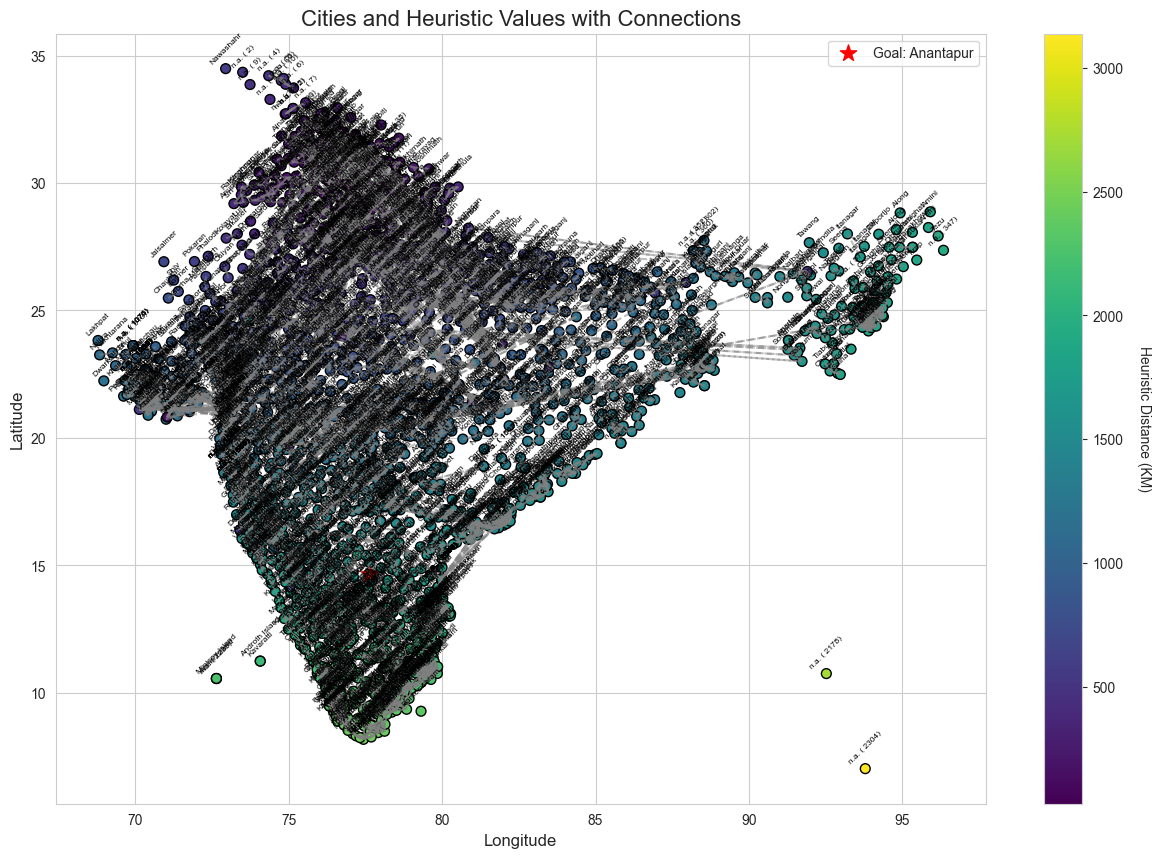

In [163]:

# Create a scatter plot for cities
plt.figure(figsize=(15, 10))  # Larger figure size for better readability

# Plot cities with heuristic values as color
scatter = plt.scatter(
    data1_New['Longitude'], 
    data1_New['Latitude'], 
    c=data1_New['Heuristic_dist_KM'], 
    cmap='viridis', 
    s=50,  # Adjust marker size for better visibility
    edgecolor='black'  # Add a border around markers
)

# Add city names as labels for every nth city to avoid clutter
for i, row in data1_New.iterrows():
    plt.text(
    row['Longitude'], 
    row['Latitude'] + 0.2,  # Offset labels slightly above the markers
    row['City'], 
    fontsize=6,             # Smaller font size for labels
    ha='center', 
    color='black',
    rotation= 45
    )
# Add connections (neighbors)
for i, row in data1_New.iterrows():
    neighbors = eval(row['Neighbors'])  # Convert string representation of list to actual list
    for neighbor in neighbors:
        neighbor_row = data1_New[data1_New['City'] == neighbor]
        if not neighbor_row.empty:
            plt.plot(
                [row['Longitude'], neighbor_row['Longitude'].values[0]], 
                [row['Latitude'], neighbor_row['Latitude'].values[0]], 
                color='gray', 
                linestyle='--', 
                alpha=0.5  # Make lines semi-transparent
            )

# Add color bar for heuristic values
cbar = plt.colorbar(scatter)
cbar.set_label('Heuristic Distance (KM)', rotation=270, labelpad=20)

# Highlight the goal city (e.g., Bengaluru)
goal_city = "Anantapur"  # Replace with your goal city name
goal_row = data1[data1['City'] == goal_city]
if not goal_row.empty:
    plt.scatter(
        goal_row['Longitude'], goal_row['Latitude'], 
        c='red', s=150, marker='*', label=f"Goal: {goal_city}"
    )

# Add labels and title
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Cities and Heuristic Values with Connections', fontsize=16)
plt.legend(loc='upper right')
plt.grid(True)

# Show plot
plt.show()

In [176]:
import time
import heapq
data1_New= pd.read_csv('../datasets/New_City_Data_h.csv')


In [188]:
def calculate_distance(lat1, lon1, lat2, lon2):
    # Haversine formula to calculate straight-line distance
    R = 6371  # Radius of Earth in kilometers
    lat1_rad, lon1_rad = math.radians(lat1), math.radians(lon1)
    lat2_rad, lon2_rad = math.radians(lat2), math.radians(lon2)
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

def a_star_meet(data1_new, start_city1, start_city2, goal_city):
    # Create a graph representation
    graph = {}
    for i, row in data1_new.iterrows():
        neighbors = eval(row['Neighbors'])  # Convert string representation of list to actual list
        graph[row['City']] = {neighbor: calculate_distance(row['Latitude'], row['Longitude'], data1_new.loc[data1_new['City'] == neighbor, 'Latitude'].values[0], data1_new.loc[data1_new['City'] == neighbor, 'Longitude'].values[0]) * 2 for neighbor in neighbors}

    # Extract heuristic values
    heuristics = {}
    for city in data1_new['City']:
        lat, lon = data1_new.loc[data1_new['City'] == city, ['Latitude', 'Longitude']].values[0]
        goal_lat, goal_lon = data1_new.loc[data1_new['City'] == goal_city, ['Latitude', 'Longitude']].values[0]
        heuristics[city] = calculate_distance(lat, lon, goal_lat, goal_lon)

    # Simultaneous A* Search
    queue1 = [(0 + heuristics[start_city1], 0, start_city1, [start_city1])]  # Priority queue for you
    queue2 = [(0 + heuristics[start_city2], 0, start_city2, [start_city2])]  # Priority queue for your friend
    visited1 = set()
    visited2 = set()
    nodes_generated = 0
    start_time = time.time()

    while queue1 and queue2:
        f1, g1, current1, path1 = heapq.heappop(queue1)
        f2, g2, current2, path2 = heapq.heappop(queue2)
        nodes_generated += 2

        if current1 == current2:
            end_time = time.time()
            return current1, nodes_generated, end_time - start_time, path1, path2

        if current1 not in visited1:
            visited1.add(current1)
            for neighbor, cost in graph[current1].items():
                if neighbor not in visited1:
                    new_g = g1 + cost
                    new_f = new_g + heuristics[neighbor]
                    heapq.heappush(queue1, (new_f, new_g, neighbor, path1+ [neighbor]))

        if current2 not in visited2:
            visited2.add(current2)
            for neighbor, cost in graph[current2].items():
                if neighbor not in visited2:
                    new_g = g2 + cost
                    new_f = new_g + heuristics[neighbor]
                    heapq.heappush(queue2, (new_f, new_g, neighbor, path2 + [neighbor]))

    end_time = time.time()
    return None, nodes_generated, end_time - start_time, None, None

# Example usage
start_city1 = 'Ranchi'  # Your starting city
start_city2 = 'Alipur'  # Your friend's starting city
goal_city = 'Hazaribag'  # Meeting point goal

result_meet, nodes_meet, time_meet, path1, path2 = a_star_meet(data1_New, start_city1, start_city2, goal_city)
print(f"Meeting Point: {result_meet}, Nodes Generated: {nodes_meet}, Time: {time_meet:.4f} seconds")


Meeting Point: None, Nodes Generated: 4, Time: 0.0001 seconds


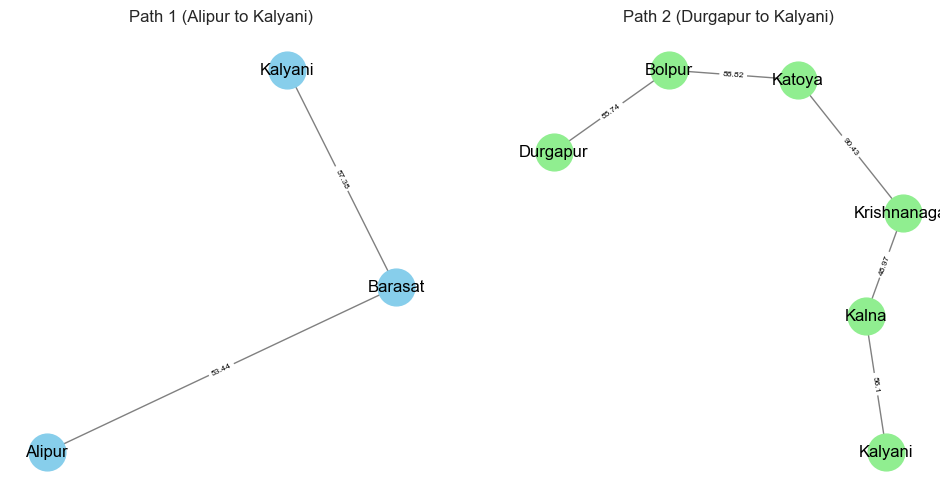

In [182]:
if path1 and path2:
    # Create transition graphs
    G1 = nx.Graph()
    for i in range(len(path1) - 1):
        city1 = path1[i]
        city2 = path1[i + 1]
        weight = calculate_distance(data1_New.loc[data1_New['City'] == city1, 'Latitude'].values[0], data1_New.loc[data1_New['City'] == city1, 'Longitude'].values[0], data1_New.loc[data1_New['City'] == city2, 'Latitude'].values[0], data1_New.loc[data1_New['City'] == city2, 'Longitude'].values[0]) * 2
        G1.add_edge(city1, city2, weight=weight)

    G2 = nx.Graph()
    for i in range(len(path2) - 1):
        city1 = path2[i]
        city2 = path2[i + 1]
        weight = calculate_distance(data1_New.loc[data1_New['City'] == city1, 'Latitude'].values[0], data1_New.loc[data1_New['City'] == city1, 'Longitude'].values[0], data1_New.loc[data1_New['City'] == city2, 'Latitude'].values[0], data1_New.loc[data1_New['City'] == city2, 'Longitude'].values[0]) * 2
        G2.add_edge(city1, city2, weight=weight)

    # Get node positions
    pos = {}
    for i, row in data1_New.iterrows():
        pos[row['City']] = (row['Longitude'], row['Latitude'])

    # Plot transition graphs
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    nx.draw(G1, pos, with_labels=True, node_size=700, node_color='skyblue', edge_color='gray')
    edge_labels1 = {k: round(v, 2) for k, v in nx.get_edge_attributes(G1, 'weight').items()}
    nx.draw_networkx_edge_labels(G1, pos, edge_labels=edge_labels1, font_size=6, font_color='black')
    plt.title(f"Path 1 ({start_city1} to {result_meet})")

    plt.subplot(1, 2, 2)
    nx.draw(G2, pos, with_labels=True, node_size=700, node_color='lightgreen', edge_color='gray')
    edge_labels2 = {k: round(v, 2) for k, v in nx.get_edge_attributes(G2, 'weight').items()}
    nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_labels2, font_size=6, font_color='black')
    plt.title(f"Path 2 ({start_city2} to {result_meet})")

    plt.show()
else:
    print("No path found.")

In [171]:
def greedy_best_first_search_meet(data1_new, start_city1, start_city2, goal_city):
    # Create a graph representation
    graph = {}
    for i, row in data1_new.iterrows():
        neighbors = eval(row['Neighbors'])  # Convert string representation of list to actual list
        graph[row['City']] = {neighbor: calculate_distance(row['Latitude'], row['Longitude'], data1_new.loc[data1_new['City'] == neighbor, 'Latitude'].values[0], data1_new.loc[data1_new['City'] == neighbor, 'Longitude'].values[0]) * 2 for neighbor in neighbors}

    # Extract heuristic values
    heuristics = {}
    for city in data1_new['City']:
        lat, lon = data1_new.loc[data1_new['City'] == city, ['Latitude', 'Longitude']].values[0]
        goal_lat, goal_lon = data1_new.loc[data1_new['City'] == goal_city, ['Latitude', 'Longitude']].values[0]
        heuristics[city] = calculate_distance(lat, lon, goal_lat, goal_lon)

    # Simultaneous Greedy Best First Search
    queue1 = [(heuristics[start_city1], start_city1, [start_city1])]  # Priority queue for you with path
    queue2 = [(heuristics[start_city2], start_city2, [start_city2])]  # Priority queue for your friend with path
    visited1 = set()
    visited2 = set()
    nodes_generated = 0
    start_time = time.time()

    while queue1 and queue2:
        _, current1, path1 = heapq.heappop(queue1)
        _, current2, path2 = heapq.heappop(queue2)
        nodes_generated += 2

        if current1 == current2:
            end_time = time.time()
            return current1, nodes_generated, end_time - start_time, path1, path2

        if current1 not in visited1:
            visited1.add(current1)
            for neighbor in graph[current1]:
                if neighbor not in visited1:
                    heapq.heappush(queue1, (heuristics[neighbor], neighbor, path1+ [neighbor]))

        if current2 not in visited2:
            visited2.add(current2)
            for neighbor in graph[current2]:
                if neighbor not in visited2:
                    heapq.heappush(queue2, (heuristics[neighbor], neighbor, path2+ [neighbor]))

    end_time = time.time()
    return None, nodes_generated, end_time - start_time, None, None

# Example usage
start_city1 = 'Jind'  # Your starting city
start_city2 = 'Phagwara'  # Your friend's starting city
# goal_city = 'Ludhiana'  # Meeting point goal

result_greedy, nodes_greedy, time_greedy, path1, path2 = greedy_best_first_search_meet(data1_New, start_city1, start_city2, goal_city)
print(f"Meeting Point (Greedy): {result_greedy}, Nodes Generated: {nodes_greedy}, Time: {time_greedy:.4f} seconds")

Meeting Point (Greedy): Balachaur, Nodes Generated: 54, Time: 0.0003 seconds


Updated

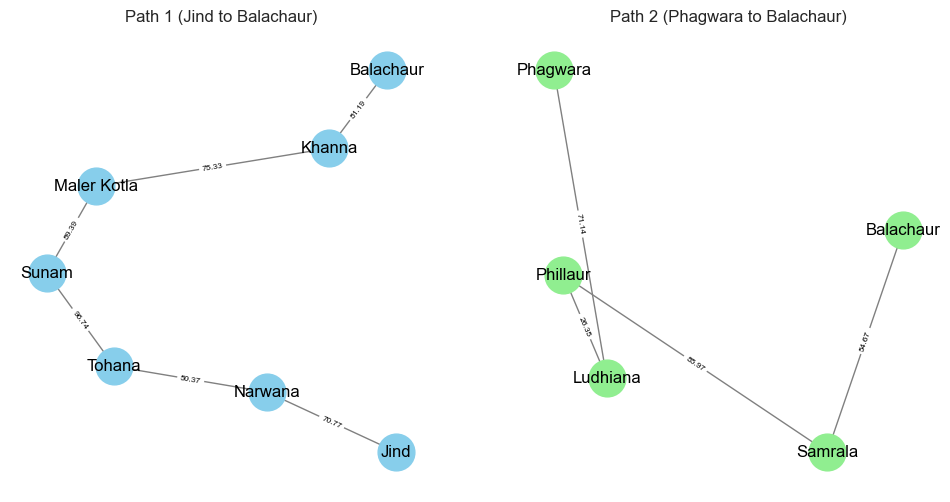

In [172]:
if path1 and path2:
    # Create transition graphs for each path
    G1 = nx.Graph()
    for i in range(len(path1) - 1):
        city1 = path1[i]
        city2 = path1[i+1]
        weight = calculate_distance(data1_New.loc[data1_New['City']== city1, 'Latitude'].values[0], data1_New.loc[data1_New['City'] == city1, 'Longitude'].values[0], data1_New.loc[data1_New['City'] == city2, 'Latitude'].values[0], data1_New.loc[data1_New['City'] == city2, 'Longitude'].values[0])*2
        G1.add_edge(city1, city2, weight=weight)

    G2 = nx.Graph()
    for i in range(len(path2) - 1):
        city1 = path2[i]
        city2 = path2[i+1]
        weight = calculate_distance(data1_New.loc[data1_New['City']== city1, 'Latitude'].values[0], data1_New.loc[data1_New['City'] == city1, 'Longitude'].values[0], data1_New.loc[data1_New['City'] == city2, 'Latitude'].values[0], data1_New.loc[data1_New['City'] == city2, 'Longitude'].values[0])*2
        G2.add_edge(city1, city2, weight=weight)
        

    # Get node positions from data1_new
    pos = {}
    for i, row in data1_New.iterrows():
        pos[row['City']] = (row['Longitude'], row['Latitude'])

    # Plot transition graphs
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    nx.draw(G1, pos, with_labels=True, node_size=700, node_color='skyblue', edge_color='gray')
    edge_labels1 = {k: round(v, 2) for k, v in nx.get_edge_attributes(G1, 'weight').items()}
    nx.draw_networkx_edge_labels(G1, pos, edge_labels=edge_labels1, font_size=6, font_color='black')
    plt.title(f"Path 1 ({start_city1} to {result_greedy})")

    plt.subplot(1, 2, 2)
    nx.draw(G2, pos, with_labels=True, node_size=700, node_color='lightgreen', edge_color='gray')
    edge_labels2 = {k: round(v,2) for k, v in nx.get_edge_attributes(G2, 'weight').items()}
    nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_labels2, font_size=6, font_color= 'black')
    plt.title(f"Path 2 ({start_city2} to {result_greedy})")

    plt.show()
else:
    print("No path found.")

In [ ]:
def greedy_best_first_search(graph, heuristics, start, goal):
    queue = [(heuristics[start], start)]  # Priority queue based on heuristic
    visited = set()
    nodes_generated = 0
    start_time = time.time()

    while queue:
        _, current = heapq.heappop(queue)
        nodes_generated += 1

        if current == goal:
            end_time = time.time()
            return current, nodes_generated, end_time - start_time

        if current not in visited:
            visited.add(current)
            for neighbor in graph[current]:
                if neighbor not in visited:
                    heapq.heappush(queue, (heuristics[neighbor], neighbor))

    end_time = time.time()
    return None, nodes_generated, end_time - start_time



In [ ]:
def a_star_search(graph, heuristics, start, goal):
    queue = [(0 + heuristics[start], 0, start)]  # Priority queue based on f = g + h
    visited = set()
    nodes_generated = 0
    start_time = time.time()

    while queue:
        f, g, current = heapq.heappop(queue)
        nodes_generated += 1

        if current == goal:
            end_time = time.time()
            return current, nodes_generated, end_time - start_time

        if current not in visited:
            visited.add(current)
            for neighbor, cost in graph[current].items():
                if neighbor not in visited:
                    new_g = g + cost
                    new_f = new_g + heuristics[neighbor]
                    heapq.heappush(queue, (new_f, new_g, neighbor))

    end_time = time.time()
    return None, nodes_generated, end_time - start_time


In [173]:
# Load the dataset

# Convert neighbors column from string to list
data1_New['Neighbors'] = data1_New['Neighbors'].apply(lambda x: x if isinstance(x, list) else eval(str(x)))

# Create a graph representation
graph = {}
for _, row in data1_New.iterrows():
    graph[row['City']] = {neighbor: row['Heuristic_dist_KM'] * 2 for neighbor in row['Neighbors']}

# Extract heuristic values
heuristics = dict(zip(data1_New['City'], data1_New['Heuristic_dist_KM']))

# Example usage
start_city = 'Sonipat'  # Replace with your start city
goal_city = 'Ambala'  # Replace with your goal city

# Greedy Best First Search
result_greedy, nodes_greedy, time_greedy = greedy_best_first_search(graph, heuristics, start_city, goal_city)
print(f"Greedy Best First Search: Result={result_greedy}, Nodes={nodes_greedy}, Time={time_greedy:.4f} seconds")

# A* Search
result_a_star, nodes_a_star, time_a_star = a_star_search(graph, heuristics, start_city, goal_city)
print(f"A* Search: Result={result_a_star}, Nodes={nodes_a_star}, Time={time_a_star:.4f} seconds")




NameError: name 'greedy_best_first_search' is not defined